# Homework #4:


In [20]:
import pymc as pm
import arviz as az
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# True values
mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 100, 10, 2, 15

# Generate data
x = stats.t(df = df_true, loc = loc_true, scale = scale_true).rvs(n)

In [22]:
# Bayesian model specification using PyMC
with pm.Model() as model:
    # Define priors for the parameters
    loc = pm.Normal('loc', mu = mu_0, sigma = sigma_0)  # Prior for the location parameter of the Student's t-distribution
    scale = pm.HalfNormal('scale', sigma = 5)  # Prior for the scale parameter of the Student's t-distribution
    df = pm.DiscreteUniform('df', lower = 1, upper = 100) # Prior for the degrees of freedom parameter of the Student's t-distribution

    # Define the likelihood
    x_obs = pm.StudentT('x_obs', mu = loc, lam = 1/scale**2, nu = df, observed = x)

    # Posterior
    trace = pm.sample(draws = 3000, tune = 2000, target_accept = 0.95)

Effective sample size for df parameter: df    8.55
Name: ess_bulk, dtype: float64


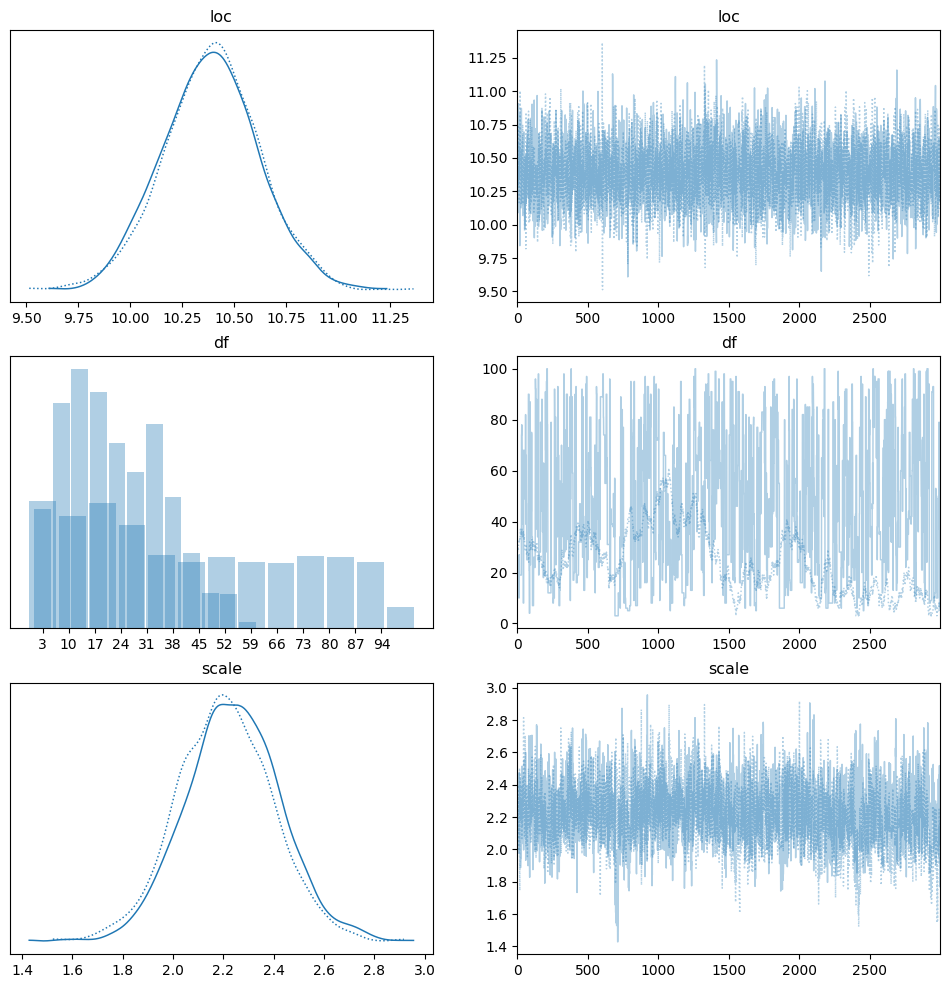

In [23]:
# Analyze the posterior samples
az.plot_trace(trace, figsize=(12,12))
az.summary(trace, round_to = 2)

# Analyze the effective sample size (ESS) for the degrees of freedom (df) parameter
df_summary = az.summary(trace, var_names = ['df'], round_to = 2)
df_ess = df_summary['ess_bulk']
print(f"Effective sample size for df parameter: {df_ess}")

array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>]], dtype=object)

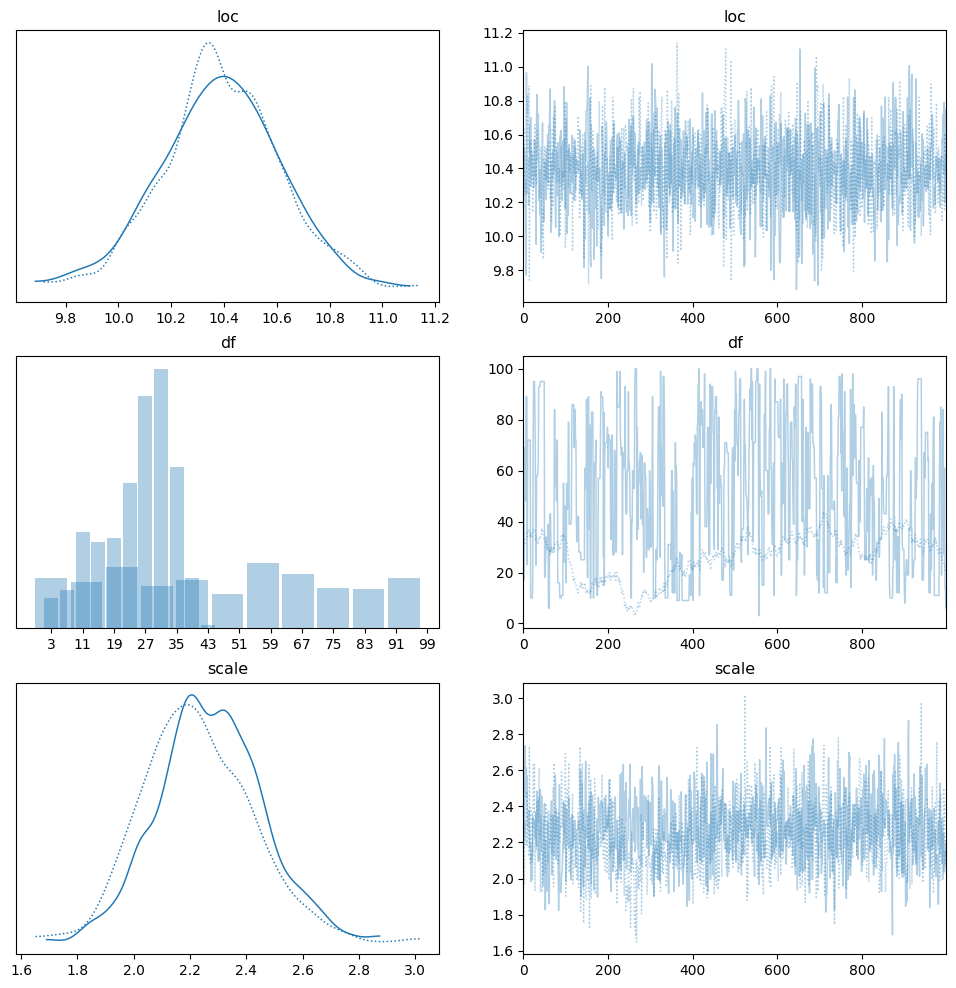

In [24]:
with pm.Model() as t_norm_half_norm_discrete:
    # Priors
    loc = pm.Normal("loc", mu = 0, sigma = 10)
    scale = pm.HalfNormal("scale", sigma = 5)
    df = pm.DiscreteUniform("df", lower = 1,upper = 100)

    # Likelihood
    x_obs = pm.StudentT("likelihood", mu = loc, sigma = scale, nu = df, observed = x)

   # Sampling
with t_norm_half_norm_discrete:
    idata = pm.sample()

az.plot_trace(idata,figsize=(12,12))